Project : Stock Prediction using RNN and LSTM

Name : Purva Rajan Dhadve

Email id : purvadhadve2002@gmail.com

Linkedin id : https://www.linkedin.com/in/purva-dhadve-620086246/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Dense, SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("Google_Stock_Price.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.shape

(1258, 6)

In [5]:
# description of the data (max, min, std)
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
# Data Correlation : Relationship between columns
df.corr()

,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


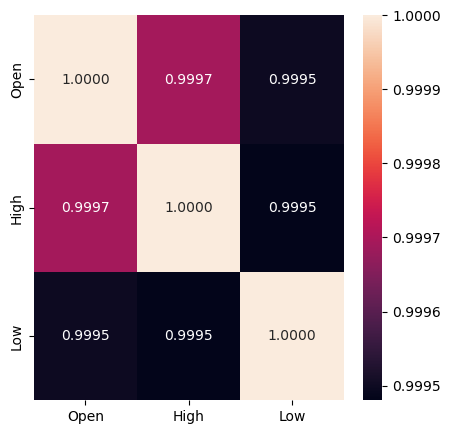

In [7]:
# Visualization of correlation result with seaborn library
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(),annot=True, linecolor='black', fmt="0.4f", ax=ax)
plt.show()

In [8]:
# seprate the open price data from the data frame df
# and then we will apply RNN model on it
data_set = df.loc[:,["Open"]].values
print(data_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [9]:
train = data_set[:len(data_set)-250]
test = data_set[len(train):]

In [10]:
train[0:10]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04],
       [313.7 ],
       [310.59],
       [314.43],
       [311.96],
       [314.81]])

In [11]:
train.reshape(train.shape[0],1)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [769.5 ],
       [743.  ],
       [746.45]])

In [12]:
# we have to normalize the train data set values between zero and one
# we use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaler = scaler.fit_transform(train)

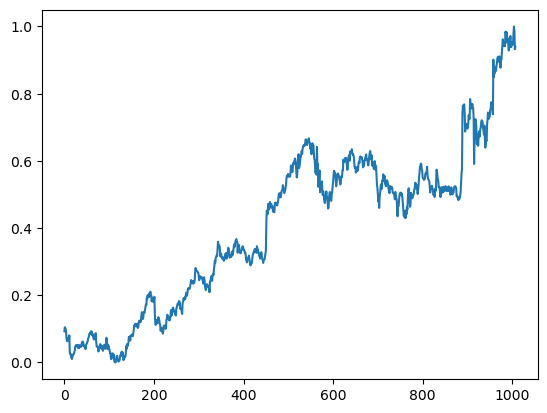

In [13]:
# we would now visualize the train_scaler
plt.plot(train_scaler)
plt.show()

In [14]:
# let us create the data
x_train = []
y_train = []
time_steps = 50
for i in range(time_steps,len(train_scaler)):
    x_train.append(train_scaler[i-time_steps:i,0])
    y_train.append(train_scaler[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train

array([[0.09272735, 0.10482833, 0.10193375, ..., 0.03972019, 0.04848436,
        0.05473587],
       [0.10482833, 0.10193375, 0.09893865, ..., 0.04848436, 0.05473587,
        0.05634397],
       [0.10193375, 0.09893865, 0.08627483, ..., 0.05473587, 0.05634397,
        0.06064565],
       ...,
       [0.77373965, 0.75385945, 0.73888398, ..., 0.9524001 , 0.9800796 ,
        1.        ],
       [0.75385945, 0.73888398, 0.90130256, ..., 0.9800796 , 1.        ,
        0.98572807],
       [0.73888398, 0.90130256, 0.84913966, ..., 1.        , 0.98572807,
        0.9324596 ]])

In [16]:
y_train

array([5.63439736e-02, 6.06456541e-02, 6.28768996e-02, 7.06762081e-02,
       7.43748492e-02, 7.82745035e-02, 8.63753317e-02, 8.47873281e-02,
       8.68175605e-02, 9.18227868e-02, 9.32298786e-02, 9.15413685e-02,
       8.05459516e-02, 8.51893543e-02, 7.82141996e-02, 7.20028946e-02,
       6.82439495e-02, 7.32893785e-02, 7.37316073e-02, 8.21339551e-02,
       8.73401946e-02, 6.27562917e-02, 4.82833481e-02, 4.77808153e-02,
       4.54088607e-02, 4.39816676e-02, 3.26043258e-02, 3.79512744e-02,
       4.37203506e-02, 5.06352014e-02, 5.47559701e-02, 5.27257377e-02,
       4.35193375e-02, 4.09262684e-02, 4.93487175e-02, 4.56500764e-02,
       3.47149634e-02, 4.52480502e-02, 4.65546354e-02, 5.27056364e-02,
       5.00924660e-02, 4.05041409e-02, 4.50671384e-02, 5.77108627e-02,
       7.35908981e-02, 6.48468280e-02, 4.02227225e-02, 5.31679666e-02,
       4.13684972e-02, 4.88863874e-02, 4.07252553e-02, 3.55190158e-02,
       2.78604165e-02, 2.84232532e-02, 1.14778484e-02, 9.90994613e-03,
      

In [17]:
x_train.shape

(958, 50)

In [18]:
# reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [19]:
x_train.shape

(958, 50, 1)

In [20]:
def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(look_back,1), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [21]:
model_r = model_rnn(50)

In [22]:
model_r.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_r.fit(x_train, y_train,epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 5ms/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1167
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 8.6003e-04 - mse: 8.6003e-04 - mae: 0.0219
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 5.2837e-04 - mse: 5.2837e-04 - mae: 0.0165
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 4.3709e-04 - mse: 4.3709e-04 - mae: 0.0145
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 4.1251e-04 - mse: 4.1251e-04 - mae: 0.0138
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 3.9712e-04 - mse: 3.9712e-04 - mae: 0.0134
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 3.7300e-04 - mse: 3.7300e-04 - mae: 0.0128
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 3.6378e-04 - mse: 3.6378e-04 - mae: 0.0127
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 3.6271e

In [24]:
test_x=[]
test_y = []
time_step = 50
for i in range(50,len(test)):
    test_x.append(test[i-time_step:i,0])
    test_y.append(test[i,0])

In [25]:
test_lbl = test_y

In [26]:
test_x = scaler.fit_transform(test_x)

In [27]:
test_y = scaler.fit_transform(np.array(test_y).reshape(-1,1))

In [28]:
test_y = test_y.reshape(1,-1)

In [29]:
test_x[0:50]

array([[0.47664698, 0.46112957, 0.46954596, ..., 0.38385502, 0.38007963,
        0.44927238],
       [0.47902447, 0.46954596, 0.35998523, ..., 0.38007963, 0.44927238,
        0.48640857],
       [0.48776747, 0.35998523, 0.39741602, ..., 0.44927238, 0.48640857,
        0.4496156 ],
       ...,
       [0.45302554, 0.43204134, 0.50645995, ..., 0.21018671, 0.24389072,
        0.24615596],
       [0.44880742, 0.50645995, 0.54640089, ..., 0.24389072, 0.24615596,
        0.34157057],
       [0.52611397, 0.54640089, 0.50682909, ..., 0.24615596, 0.34157057,
        0.35605437]])

In [30]:
test_y[0:50]

array([[0.48640857, 0.4496156 , 0.45620538, 0.48984075, 0.41879462,
        0.45160626, 0.43650467, 0.5429709 , 0.53713619, 0.46403075,
        0.54269632, 0.45991214, 0.44460461, 0.51050247, 0.50089237,
        0.49437122, 0.45991214, 0.5365184 , 0.56981054, 0.56960461,
        0.61408567, 0.67620813, 0.59719934, 0.57921472, 0.37959912,
        0.30958265, 0.37355848, 0.24910763, 0.25576606, 0.1352279 ,
        0.18279791, 0.177581  , 0.13378638, 0.18327842, 0.18794618,
        0.28143877, 0.31404448, 0.35976112, 0.31617243, 0.28095826,
        0.26173806, 0.30882757, 0.22425865, 0.21526634, 0.21018671,
        0.24389072, 0.24615596, 0.34157057, 0.35605437, 0.36387974,
        0.41694124, 0.43609281, 0.42215815, 0.39998627, 0.37005766,
        0.33525535, 0.36353652, 0.35605437, 0.33271554, 0.31239703,
        0.3121911 , 0.32948929, 0.30141406, 0.25844316, 0.19062328,
        0.18808347, 0.19261395, 0.18156233, 0.02862438, 0.        ,
        0.05470895, 0.08237232, 0.09932729, 0.14

In [31]:
# convert in to array
test_x,test_y = np.array(test_x),np.array(test_y)

In [32]:
# reshaping the test data
test_x = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [33]:
predict_price = model_r.predict(test_x)

7/7 [==============================] - 0s 1ms/step


In [34]:
predicted_stock_price = scaler.inverse_transform(predict_price)

In [35]:
predict_price[0:2]

array([[0.44804743],
       [0.49039915]], dtype=float32)

In [36]:
predict_price[0:2]

array([[0.44804743],
       [0.49039915]], dtype=float32)

In [37]:
predicted_stock_price[0:2]

array([[736.27155],
       [742.44135]], dtype=float32)

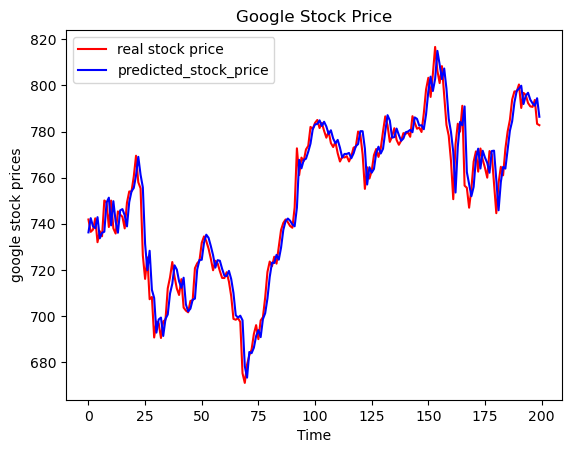

In [38]:
plt.plot(test_lbl, color='Red', label= "real stock price")
plt.plot(predicted_stock_price, color='Blue', label="predicted_stock_price")
plt.title("Google Stock Price")
plt.xlabel("Time")
plt.ylabel("google stock prices")
plt.legend()
plt.show()

In [39]:
def lstm_mdl(timesteps):
    model = Sequential()
    model.add(LSTM(32,input_shape=(timesteps,1), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [40]:
lstm = lstm_mdl(50)

In [41]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [42]:
lstm.fit(x_train,y_train,epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 0.1079 - mse: 0.1079 - mae: 0.2608
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0702
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0489
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0365
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0301
Epoch 6/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0256
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0230   
Epoch 8/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0226  
Epoch 9/100
30/30 [==============================] - 0s 8ms/step - loss: 9.5734e-04 - mse: 9.5734e-04 - mae: 0.0218
Epoch 10/100
30

In [43]:
pred_y = lstm.predict(test_x)

7/7 [==============================] - 0s 5ms/step


In [44]:
predicted_stock_price = scaler.inverse_transform(pred_y)

In [45]:
predicted_stock_price[0:3]

array([[734.4475 ],
       [739.5712 ],
       [737.17194]], dtype=float32)